In [1]:
!pip install --upgrade numexpr

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn


In [3]:
s3_csv_path = f's3://airlinesatisfaction/data/train.csv'
s3_csv_test_path = f's3://airlinesatisfaction/data/test.csv'
train = pd.read_csv(s3_csv_path)
test = pd.read_csv(s3_csv_test_path)

/home/ec2-user/anaconda3/envs/tensorflow2_p310/lib/python3.10/site-packages/fsspec/registry.py:272: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


In [4]:
train.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
train.shape

(103904, 25)

In [6]:
test.shape

(25976, 25)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [8]:
train.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [9]:
test.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [10]:
train.dropna(inplace=True)

In [11]:
test.dropna(inplace=True)

In [12]:
def dropds(dset):
    dset.drop(["Unnamed: 0","id"],axis=1,inplace=True)
    dset["Gender"] = dset["Gender"].map({"Male":1,"Female":0})
    dset["Customer Type"] = dset["Customer Type"].map({"Loyal Customer":1,"disloyal Customer":0})

In [13]:
dropds(train)
dropds(test)

In [14]:
train.shape

(103594, 23)

In [15]:
test.shape

(25893, 23)

In [16]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,1,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,0,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,0,1,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,0,1,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,1,1,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  int64  
 1   Customer Type                      103594 non-null  int64  
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  int64  
 1   Customer Type                      103594 non-null  int64  
 2   Age                                103594 non-null  int64  
 3   Type of Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight Distance                    103594 non-null  int64  
 6   Inflight wifi service              103594 non-null  int64  
 7   Departure/Arrival time convenient  103594 non-null  int64  
 8   Ease of Online booking             103594 non-null  int64  
 9   Gate location                      103594 non-null  int64  
 10  Food and drink                     103594 non-null  int64  
 11  Online boarding                    1035

In [19]:
travel_dum = pd.get_dummies(train[["Type of Travel"]],drop_first=True)
class_dum = pd.get_dummies(train[["Class"]],drop_first=True)
train = pd.concat([train,travel_dum,class_dum],axis=1)

In [20]:
train.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1,1,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,4,5,5,25,18.0,neutral or dissatisfied,1,0,1
1,1,0,25,Business travel,Business,235,3,2,3,3,...,3,1,4,1,1,6.0,neutral or dissatisfied,0,0,0
2,0,1,26,Business travel,Business,1142,2,2,2,2,...,4,4,4,5,0,0.0,satisfied,0,0,0
3,0,1,25,Business travel,Business,562,2,5,5,5,...,3,1,4,2,11,9.0,neutral or dissatisfied,0,0,0
4,1,1,61,Business travel,Business,214,3,3,3,3,...,4,3,3,3,0,0.0,satisfied,0,0,0


In [21]:
travel_dum = pd.get_dummies(test[["Type of Travel"]],drop_first=True)
class_dum = pd.get_dummies(test[["Class"]],drop_first=True)
test = pd.concat([test,travel_dum,class_dum],axis=1)

In [22]:
test.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0,1,52,Business travel,Eco,160,5,4,3,4,...,5,2,5,5,50,44.0,satisfied,0,1,0
1,0,1,36,Business travel,Business,2863,1,1,3,1,...,4,3,4,5,0,0.0,satisfied,0,0,0
2,1,0,20,Business travel,Eco,192,2,0,2,4,...,3,2,2,2,0,0.0,neutral or dissatisfied,0,1,0
3,1,1,44,Business travel,Business,3377,0,0,0,2,...,1,3,1,4,0,6.0,satisfied,0,0,0
4,0,1,49,Business travel,Eco,1182,2,3,4,3,...,2,4,2,4,0,20.0,satisfied,0,1,0


In [23]:
train.drop(["Type of Travel","Class"],axis=1,inplace=True)

In [24]:
test.drop(["Type of Travel","Class"],axis=1,inplace=True)

In [25]:
train.head()

,Gender,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1,1,13,460,3,4,3,1,5,3,...,4,4,5,5,25,18.0,neutral or dissatisfied,1,0,1
1,1,0,25,235,3,2,3,3,1,3,...,3,1,4,1,1,6.0,neutral or dissatisfied,0,0,0
2,0,1,26,1142,2,2,2,2,5,5,...,4,4,4,5,0,0.0,satisfied,0,0,0
3,0,1,25,562,2,5,5,5,2,2,...,3,1,4,2,11,9.0,neutral or dissatisfied,0,0,0
4,1,1,61,214,3,3,3,3,4,5,...,4,3,3,3,0,0.0,satisfied,0,0,0


In [26]:
test.head()

,Gender,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,0,1,52,160,5,4,3,4,3,4,...,5,2,5,5,50,44.0,satisfied,0,1,0
1,0,1,36,2863,1,1,3,1,5,4,...,4,3,4,5,0,0.0,satisfied,0,0,0
2,1,0,20,192,2,0,2,4,2,2,...,3,2,2,2,0,0.0,neutral or dissatisfied,0,1,0
3,1,1,44,3377,0,0,0,2,3,4,...,1,3,1,4,0,6.0,satisfied,0,0,0
4,0,1,49,1182,2,3,4,3,4,1,...,2,4,2,4,0,20.0,satisfied,0,1,0


In [27]:
train["satisfaction"] = train["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})
test["satisfaction"] = test["satisfaction"].map({"satisfied":1,"neutral or dissatisfied":0})

In [28]:
train.head()

,Gender,Customer Type,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,1,1,13,460,3,4,3,1,5,3,...,4,4,5,5,25,18.0,0,1,0,1
1,1,0,25,235,3,2,3,3,1,3,...,3,1,4,1,1,6.0,0,0,0,0
2,0,1,26,1142,2,2,2,2,5,5,...,4,4,4,5,0,0.0,1,0,0,0
3,0,1,25,562,2,5,5,5,2,2,...,3,1,4,2,11,9.0,0,0,0,0
4,1,1,61,214,3,3,3,3,4,5,...,4,3,3,3,0,0.0,1,0,0,0


In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  int64  
 1   Customer Type                      103594 non-null  int64  
 2   Age                                103594 non-null  int64  
 3   Flight Distance                    103594 non-null  int64  
 4   Inflight wifi service              103594 non-null  int64  
 5   Departure/Arrival time convenient  103594 non-null  int64  
 6   Ease of Online booking             103594 non-null  int64  
 7   Gate location                      103594 non-null  int64  
 8   Food and drink                     103594 non-null  int64  
 9   Online boarding                    103594 non-null  int64  
 10  Seat comfort                       103594 non-null  int64  
 11  Inflight entertainment             1035

In [30]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [31]:
plt.figure(figsize=(20,20))
#sns.pairplot(train)

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Axes: xlabel='Online boarding', ylabel='count'>

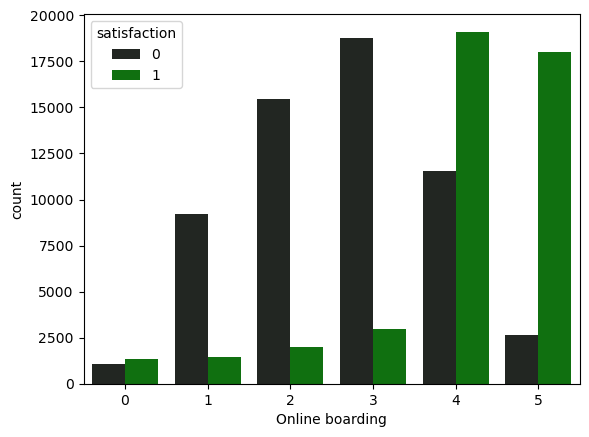

In [32]:
sns.countplot(x='Online boarding',hue="satisfaction",data=train,palette="dark:green")

<Axes: xlabel='Age', ylabel='Count'>

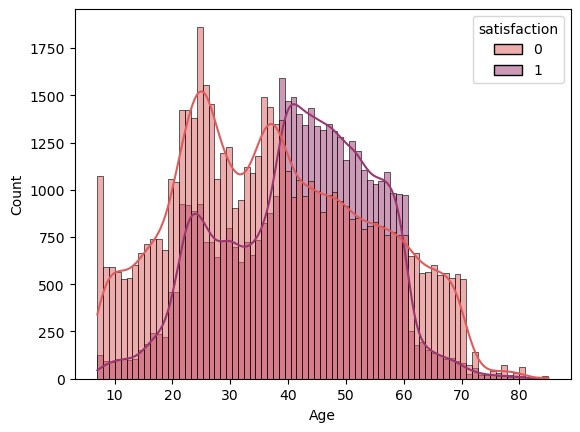

In [33]:
sns.histplot(x='Age',hue="satisfaction",data=train,kde=True,palette="flare")

<Axes: xlabel='Customer Type', ylabel='count'>

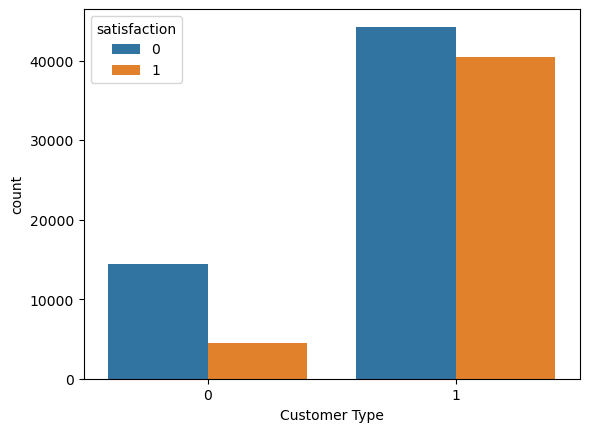

In [34]:
sns.countplot(x='Customer Type',hue="satisfaction",data=train)

<Axes: xlabel='Flight Distance', ylabel='Count'>

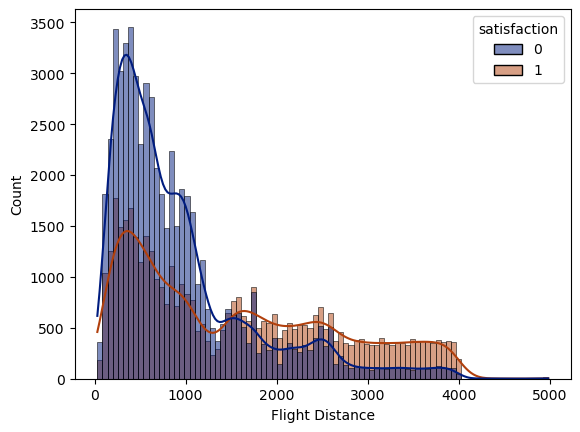

In [35]:
sns.histplot(x='Flight Distance',hue="satisfaction",data=train,kde=True,palette="dark")

<Axes: xlabel='Inflight wifi service', ylabel='count'>

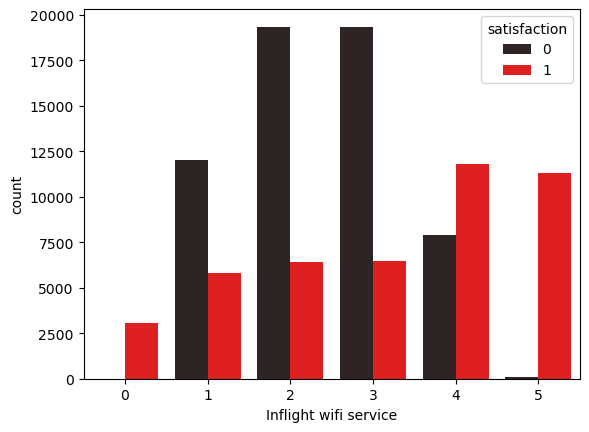

In [36]:
sns.countplot(x='Inflight wifi service',hue="satisfaction",data=train,palette="dark:red")

<Axes: xlabel='Food and drink', ylabel='count'>

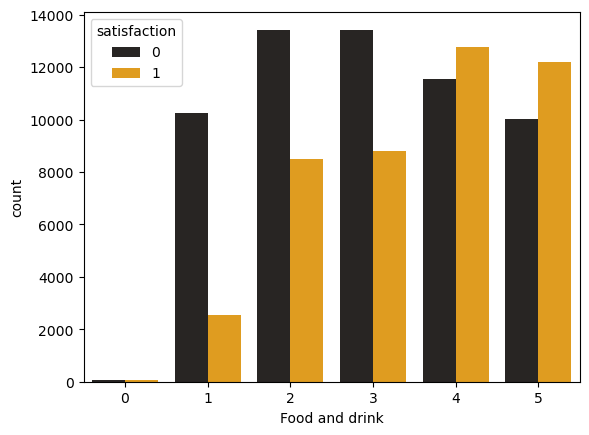

In [37]:
sns.countplot(x='Food and drink',hue="satisfaction",data=train,palette='dark:orange')

<Axes: >

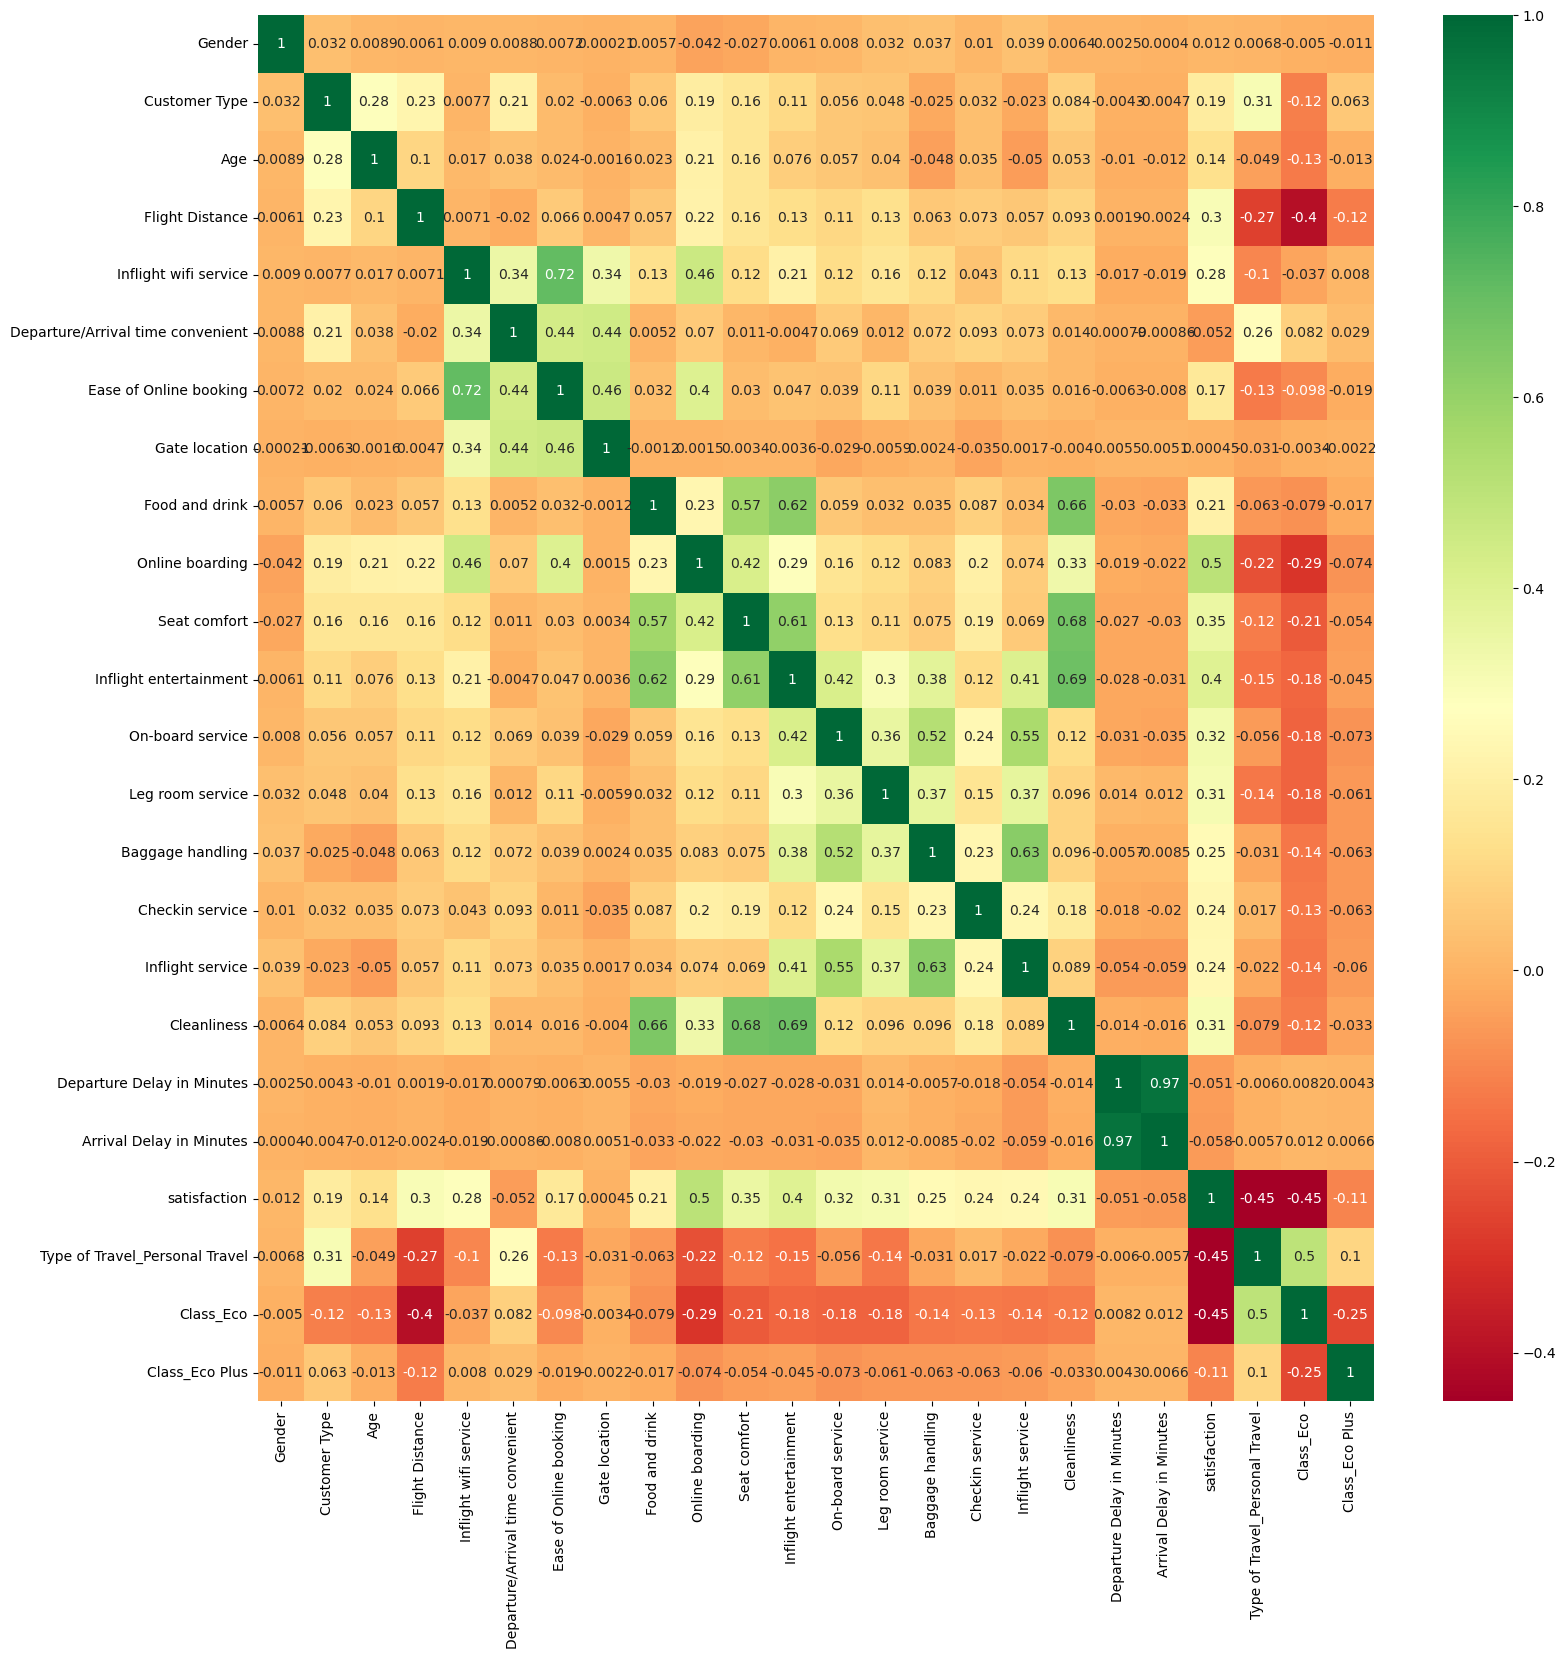

In [38]:
plt.figure(figsize = (18,18))
sns.heatmap(train.corr(), annot = True, cmap = "RdYlGn")

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
x_train = train.drop(["satisfaction"],axis=1)
y_train = train['satisfaction']

In [41]:
x_test = test.drop(["satisfaction"],axis=1)
y_test = test["satisfaction"]

In [42]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [43]:
!pip install xgboost

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [45]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [46]:
pred = xgb.predict(x_test)

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [48]:
accuracy_score(y_test,pred)

0.9626539991503495

In [49]:
confusion_matrix(y_test,pred)

array([[14201,   327],
       [  640, 10725]])

In [50]:
from sklearn.ensemble import RandomForestClassifier
reg_rf = RandomForestClassifier()

In [51]:
reg_rf.fit(x_train,y_train)
#reg_rf.score(y_test,x_test)

RandomForestClassifier()

In [52]:
rf_pred = reg_rf.predict(x_test)

In [53]:
accuracy_score(y_test,rf_pred)

0.9625381377206195